<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных**
<blockquote>
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.
</blockquote>

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams["figure.figsize"] = 8, 5


import plotly.express as px


In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

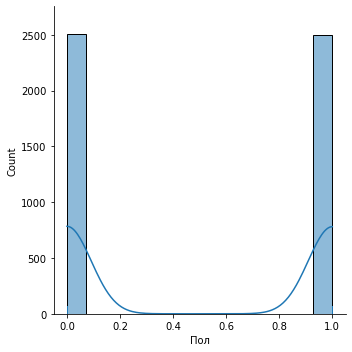

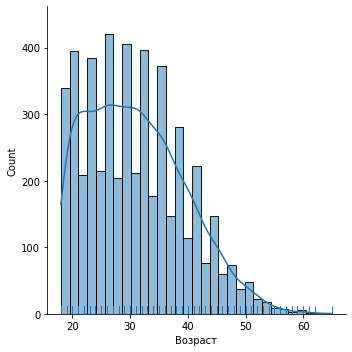

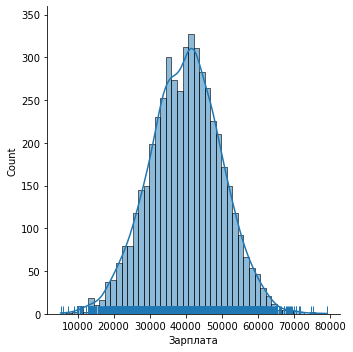

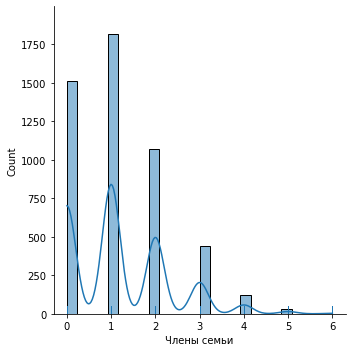

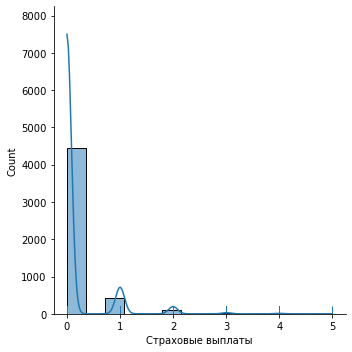

In [6]:
for column in ['Пол','Возраст', 'Зарплата', 'Члены семьи','Страховые выплаты']:
    sns.displot(data[column],kind='hist',rug=True,kde=True);    

In [7]:
data['Страховые выплаты'].value_counts()

In [8]:
fig = px.scatter_matrix(data, dimensions=['Возраст','Зарплата','Члены семьи','Страховые выплаты'], color="Пол")
fig.show()

Небольшие выводы по датасэту:

    - Визуально ввыбросов не наблюдается, пропусков тоже
    - Пол : Примерно 50/50 мужчин и женщин
    - Медианное значение возрасата 37 лет, среднее 30. Распределение скошено влево.
    - По зарплате распределение близко к нормальному. Чуть- чуть скошено вправо.
    -  В семье в среднем 1,1 член семьи, но медианное значение равно 1. 
    - страховые выплаты. 4436 человек не получали никогда страховых выплат, 423 - одни раз, 115 -чел. 2 раза и тд. Один клиент получил выплаты целых 5 раз

## Умножение матриц

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
<br>**Ответ:** Не изменится

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw+w0
$$

Функция минимизации потерь для задачи обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$
``Функция argmin() находит минимум и возвращает, при каком аргументе он был достигнут.``


Формула обучения весов модели:

$$
w = (X^T X)^{-1} X^T y
$$

Используем свойства матричных операций:
$$
(AB)^T = B^T A^T,\qquad (2)
$$
$$
(AB)^{-1} = B^{-1} A^{-1},\qquad (3)
$$

Домнажаем матрицу признаков $X$ на матрицу шифрования $P$ и подставим результат в формулу обучения (1):
$$
w_{new} = ((XP)^T (XP))^{-1} (XP)^T y
$$

рименим свойство (2) и раскроем скобки:
$$
w_{new} = (P^T X^T X P)^{-1} P^T X^T y
$$

рименим свойство (3) и раскроем скобки:
$$
w_{new} =(P^T\cdot  X^T\cdot  X\cdot  P)^{-1} P^T X^T y
$$

$$
w_{new} =(P^T\cdot (X^T  X)\cdot  P)^{-1} P^T X^T y
$$

$$
w_{new} = P^{-1} \cdot (X^T  X)^{-1} \cdot (P^T)^{-1} P^T X^T y
$$

Можнo заметить, что $(P^T)^{-1} P^T = E$, следовательно формула примет вид:
$$
w_{new} = P^{-1} X^{-1} (X^T)^{-1} X^T y
$$

Используем свойство (2) в обратном порядке для объединения в скобки:
$$
w_{new} = P^{-1} (X^T X)^{-1} X^T y
$$


Используем (1), чтобы свернуть формулу и получим следующее:
$$
w_{new} = P^{-1} w
$$

Следовательно, так как веса линейной регрессии связаны, то качество модели, определяемое коэффициентом детерминации $R2$, не изменится. Модель будет давать одинаковые предсказания.

Подставим в формулу предсказаний $a = Xw$ матрицу $X_{new} = XP$ и признаки $w_{new}$
$$
a_{new} = X P w_{new}
\\
a_{new} = X P P^{-1} w
\\
a_{new} = X w = a
$$


## Алгоритм преобразования

<blockquote>
Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется
</blockquote>
Нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Защититм данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

Алгоритм шифрования достаточно простой и состоит из обычного линейного преобразования. Оригинальный массив данных с признаками $X$ размерности $(m\ x\ n)$ мы домножаем на случайную квадратную обратимую матрицу $P$ размерности $(n\ x\ n)$, которую подбираем с помощью генератора случайных чисел:

$$
{X}' = XP
$$

Как уже было доказано выше, такое преобразование признаков не влияет на качество предсказания целевого признака. Далее, как обычно, разделяем данные на обучающую и тестовую выборки и обучаем модель на тренировочной выборке. Задача обучения остаётся такой же, признаки изменены, но значения целевого признака остались неизменными:

$$
{w}' = \arg\min_{{w}'} MSE({X}'{w}', y)
$$

Формула обучения остаётся подобной, однако слегка усложняется дополнительной матрицей:

$$
{w}' = ((XP)^{T}XP)^{-1}(XP)^{T}y
$$

После этого получим предсказания:

$$
{a}' = {X}'{w}' = XP((XP)^{T}XP)^{-1}(XP)^{T}y
$$

И оценим качество предсказаний с помощью функции MSE:
$$
MSE\ ({a}',\ y)
$$

Аналогичные манипуляции проделаем и с тестовой выборкой зашифрованных данных. Такие же операции произведем и для обычных, незашифрованных данных, после чего сравним результаты для зашифрованных и незашифрованных данных. С учётом доказательства, полученного выше, результаты для зашифрованной и незашифрованной выборок должны быть идентичными.

Кроме того, мы можем восстановить зашифрованные данные с помощью умножения преобразованной матрицы на матрицу $P^{-1}$, обратную $P$:

$$
{X}'P^{-1} = XPP^{-1} = XE = X
$$


Таким образом, на следующем шаге нам следует:
1. Создать случайную матрицу $P$ размерности $(n\ x\ n)$ для матрицы с данными $X$ размерности $(m\ x\ n)$.

    
2. Сразу проверяем полученную матрицу на обратимость.

    2.1. Если матрица обратима, идём дальше.
    
    2.2. Если матрица необратима, генерируем новые матрицы, до тех пор пока не получим обратимую матрицу или пока не достигнем лимита итераций.
    
    
3. Сохранаяем пару матриц $P,\ P^{-1}$ как ключи для шифровки/ дешифровки.

    
4. Преобразовываем данные с помощью умножения матрицы $X$ на матрицу $P$.

    
5. Проверяем способность восстановить данные с помощью умножения на матрицу $P^{-1}$.

    
6. Сравниваем метрики для линейной регрессии на оригинальных и преобразованных данных.

    
7. Делаем вывод.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Алгоритм верный, можем переходить к проверкам.

</div>


## Проверка алгоритма

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

In [9]:
features = data.drop(columns='Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(
    features,    target,     random_state=12345,shuffle=True,   test_size=0.25)

In [10]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 для линейной регрессии',r2_score(target_test, predictions))

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Здорово, что написал линейную регрессию сам.

</div>


In [11]:
# выведем саму матрицу
rand_matrix = np.random.randint(5, size=(4, 4))
rand_matrix

In [12]:
# проверка обратимости матрицы
np.linalg.inv(rand_matrix)

In [13]:
# продемонстрируем перемноженную матрицу
multiple_feature = pd.DataFrame(features@np.random.randint(5, size=(4, 4)))
multiple_feature.columns = features.columns
display(multiple_feature)

In [14]:
features_train = features_train.dot(rand_matrix)
features_test = features_test.dot(rand_matrix)
    
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('Значение метрики R2 для линейной регрессии после преобразования',r2_score(target_test, predictions))

Как мы увидили на практике домножение признаков на обратимую квадратную матрицу не повлияло на качество модели. Данные успешно зашифрованы и неподготовленный человек не сможет проанализировать наши данные. В то же время это позволяет нам успешно предсказывать для каждого клиента количество страховых выплат.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования